In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [10]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
1801.1      1
50.9        1
1940.85     1
933.3       1
478.75      1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [12]:
df['TotalCharges'].value_counts()

20.2       11
19.75       9
19.65       8
19.9        8
20.05       8
           ..
1801.1      1
50.9        1
1940.85     1
933.3       1
478.75      1
Name: TotalCharges, Length: 6530, dtype: int64

In [13]:
df['TotalCharges'].isnull().sum()

11

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum()/len(df)*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [26]:
df.isnull().mean()*100/len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [18]:
df = df.dropna()

In [20]:
df.isnull().sum().sum()

0

In [21]:
# convert datatype of TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype
# if this gives error use, pd.to_numeric(data['TotalCharges'], errors='coerce')

dtype('float64')

In [25]:
df[['TotalCharges']]['TotalCharges'].dtypes

dtype('float64')

In [22]:
# Feature Selection - Chi-Square
import scipy.stats
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [53]:
col_list = list(df.columns)
col_list.remove('Churn')
data = pd.DataFrame(columns = ['features', 'pvalue'])

for col in col_list:
    if df[col].dtype == 'object':
        
        # observed value
        dataset_table = pd.crosstab(df[col], df['Churn'])
        observed_values = dataset_table.values
        
        # expected value
        val = chi2_contingency(dataset_table)
        expected_values = val[3]
        
        # chi square statics
        chi_square = sum([(o-e)**2/e for o,e in zip(observed_values,expected_values)])
        chi_square_static = chi_square[0] + chi_square[1]
        
        # critcal value
        no_of_rows = len(dataset_table.iloc[0:2,0])
        no_of_columns = len(dataset_table.iloc[0,0:2])
        ddof = (no_of_rows - 1)*(no_of_columns - 1)
        alpha = 0.05
        critical_value = scipy.stats.chi2.ppf(q=1-alpha, df=ddof)
        
        # p value
        p_value = 1-chi2.cdf(x=chi_square_static, df=ddof)
        
        #-----------------------------------------------------
        
        data = pd.concat([data, pd.DataFrame({'features': [col], 'pvalue':[ p_value]})], ignore_index=True)

In [29]:
dataset_table

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [30]:
observed_values

array([[1284,  258],
       [1289,  232],
       [1294, 1071],
       [1296,  308]], dtype=int64)

In [31]:
val

(645.4299001234638,
 1.4263098511063342e-139,
 3,
 array([[1132.15955631,  409.84044369],
        [1116.74104096,  404.25895904],
        [1736.41851536,  628.58148464],
        [1177.68088737,  426.31911263]]))

In [32]:
expected_values

array([[1132.15955631,  409.84044369],
       [1116.74104096,  404.25895904],
       [1736.41851536,  628.58148464],
       [1177.68088737,  426.31911263]])

In [33]:
chi_square

array([171.54557499, 473.88432513])

In [34]:
chi_square_static

645.4299001234639

In [35]:
dataset_table

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [43]:
dataset_table.iloc[0:2,0]

PaymentMethod
Bank transfer (automatic)    1284
Credit card (automatic)      1289
Name: No, dtype: int64

In [44]:
dataset_table.iloc[0,0:2]

Churn
No     1284
Yes     258
Name: Bank transfer (automatic), dtype: int64

In [40]:
no_of_rows

3

In [46]:
no_of_columns

2

In [47]:
ddof

1

In [48]:
critical_value

3.841458820694124

In [49]:
p_value

0.0

In [54]:
data

,features,pvalue
0,customerID,0.000000
1,gender,0.473665
2,Partner,0.000000
3,Dependents,0.000000
4,PhoneService,0.326886
5,MultipleLines,0.000787
6,InternetService,0.000000
7,OnlineSecurity,0.000000
8,OnlineBackup,0.000000
9,DeviceProtection,0.000000


In [55]:
# pvalue > alpha ----> drop the column
df.drop(columns = ['gender', 'PhoneService'], inplace=True, axis=1)

In [56]:
df.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
# Encoding - label
le = LabelEncoder()

In [58]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [59]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   MultipleLines     7032 non-null   int32  
 6   InternetService   7032 non-null   int32  
 7   OnlineSecurity    7032 non-null   int32  
 8   OnlineBackup      7032 non-null   int32  
 9   DeviceProtection  7032 non-null   int32  
 10  TechSupport       7032 non-null   int32  
 11  StreamingTV       7032 non-null   int32  
 12  StreamingMovies   7032 non-null   int32  
 13  Contract          7032 non-null   int32  
 14  PaperlessBilling  7032 non-null   int32  
 15  PaymentMethod     7032 non-null   int32  
 16  MonthlyCharges    7032 non-null   float64


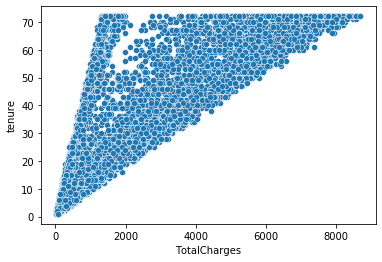

In [61]:
sns.scatterplot(x='TotalCharges', y='tenure', data=df)

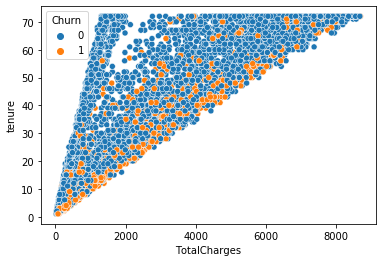

In [62]:
sns.scatterplot(x='TotalCharges', y='tenure', data=df, hue='Churn')

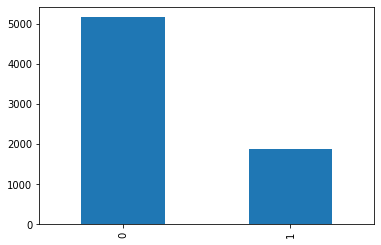

In [63]:
df['Churn'].value_counts().plot(kind='bar')

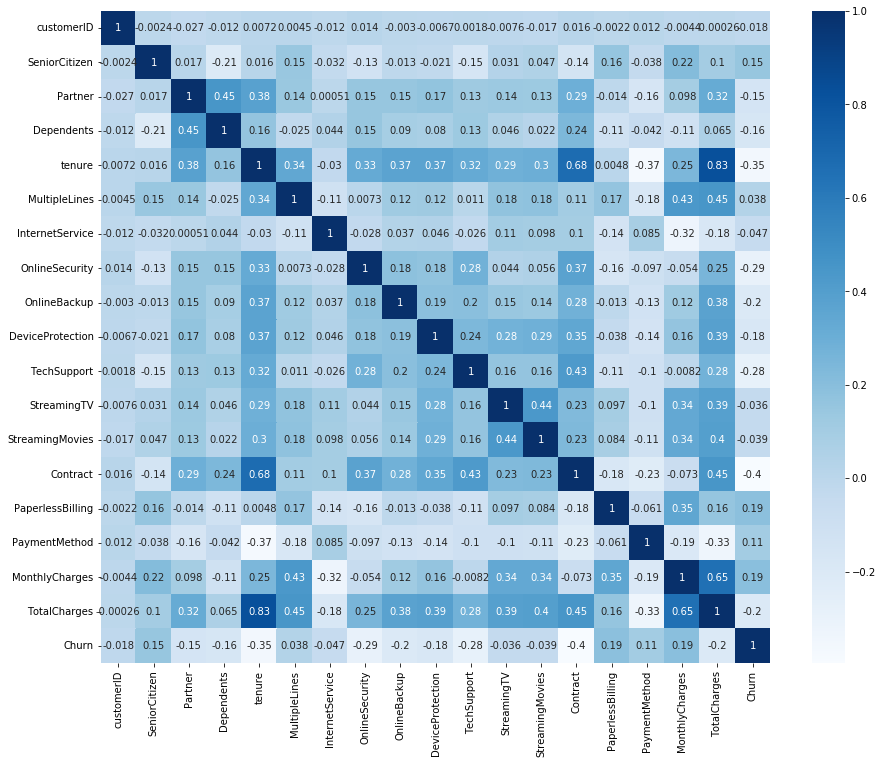

In [72]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [73]:
# Splitting the data
x = df.iloc[:,:-1]
x.head(1)

,customerID,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5365,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [74]:
y = df.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=40)

In [76]:
rf = RandomForestClassifier(random_state=40)   # n_estimators = 100 i.e. 100 DTs by default

In [77]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [79]:
ypred = rf.predict(xtest)

In [80]:
accuracy_score(ypred,ytest)

0.7846481876332623

In [81]:
confusion_matrix(ypred,ytest)

array([[919, 172],
       [131, 185]], dtype=int64)

Tips:

- Scaling ---> Robust Scaling
- Hyper Parameter Tuning (GridSearch CV)
- balance data
- feature importance

In [82]:
# Check whether data is balanced or not
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [104]:
# Imbalanced data
from imblearn.over_sampling import ADASYN

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (C:\Users\Joyita\anaconda3\lib\site-packages\sklearn\base.py)

In [86]:
# a=ADASYN(random_state=0)
# x1,y1=a.fit_resample(x,y)
# you can split your data and continue

In [87]:
# Hyper-parameter Tuning
from sklearn.model_selection import *

In [88]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'sqrt']

random_grid = {'n_estimators': n_estimators, 'max_features': max_features}

import pprint

pprint.pprint(random_grid)

{'max_features': ['auto', 'sqrt'],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [98]:
rf1 = GridSearchCV(estimator=rf, param_grid=random_grid, cv=3)
new_model = rf1.fit(xtrain,ytrain)

In [99]:
new_model.best_params_

{'max_features': 'auto', 'n_estimators': 600}

In [100]:
y_pred = rf1.predict(xtest)
accuracy_score(y_pred,ytest)

0.7874911158493249

In [101]:
rf2 = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=4, cv=3)
new_model2 = rf2.fit(xtrain,ytrain)

In [102]:
new_model2.best_params_

{'n_estimators': 700, 'max_features': 'sqrt'}

In [103]:
y_pred = rf2.predict(xtest)
accuracy_score(y_pred,ytest)

0.7874911158493249